In [1]:
%ls commercial_info_201812

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: BE61-B85F

 c:\BigData\Opendata\commercial_info_201812 디렉터리

2019-02-12  오후 02:56    <DIR>          .
2019-02-12  오후 02:56    <DIR>          ..
2019-02-12  오후 02:48        42,574,428 commercial_static_2017_.csv
2019-02-01  오후 05:27       229,866,473 commercial_store_201812_1.csv
2019-02-01  오후 05:46       209,719,479 commercial_store_201812_2.csv
2019-02-01  오후 05:53       350,993,669 commercial_store_201812_3.csv
2019-02-01  오후 05:54       319,466,329 commercial_store_201812_4.csv
               5개 파일       1,152,620,378 바이트
               2개 디렉터리   9,385,795,584 바이트 남음


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
from plotnine import *
import folium

In [4]:
shop_2018 = pd.read_csv('c://BigData/Opendata/commercial_info_201812/commercial_store_201812_1.csv', encoding='cp949')
shop_2018.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [5]:
shop_2018.shape

(500527, 39)

In [7]:
coffee = shop_2018[shop_2018['상권업종소분류명'].str.contains('커피')]
coffee.shape

(20649, 39)

In [8]:
coffee.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [9]:
coffee['상호명'].unique().shape

(13719,)

In [11]:
coffee.loc[coffee['상호명'].str.contains('스타벅스'),'상호명'].unique()

array(['스타벅스종로3가점', '스타벅스커피여의도IFC1F', '스타벅스', '스타벅스신림사거리점', '스타벅스커피홍대역',
       '스타벅스올림픽평화의문점', '스타벅스새문안로점', '스타벅스연신내역', '스타벅스연세백양로점',
       '스타벅스가락시장역점', '스타벅스외대점', '스타벅스석촌역', '스타벅스명지대점', '스타벅스압구정로데오역',
       '스타벅스연대동문', '스타벅스강남삼성타운점', '스타벅스서울대입구역점', '스타벅스신림점', '스타벅스광장점',
       '스타벅스사당점', '스타벅스신촌명물거리점', '스타벅스명동미래', '스타벅스건국클래식점', '스타벅스연희DT점',
       '스타벅스삼선교점', '스타벅스충정타워', '스타벅스올림픽공원북문점', '스타벅스커피여의도호성', '스타벅스이수역점',
       '스타벅스방배카페입구', '스타벅스종각점', '스타벅스W-MALL점', '스타벅스용산역점', '스타벅스마포일진빌딩점',
       '스타벅스천호로데오점', '스타벅스중계역점', '스타벅스명동메트로', '스타벅스마포아크로타워점',
       '스타벅스남부터미널2점', '스타벅스구로디지털로점', '스타벅스중랑구청점', '스타벅스논현힐탑', '스타벅스종로관수점',
       '스타벅스부산서면', '스타벅스삼성도심공항점', '스타벅스종로2가점', '스타벅스선정릉역점', '스타벅스미아역점',
       '스타벅스선릉로점', '스타벅스커피신도림디큐브시티B2', '스타벅스역삼럭키', '스타벅스이태원거리점',
       '스타벅스구로에이스트윈타워1점', '스타벅스을지로입구', '스타벅스교대역점', '스타벅스서울중앙우체국점',
       '스타벅스삼성교점', '스타벅스남산스테이트', '스타벅스구로하이엔드점', '스타벅스명일이마트점',
       '스타벅스조선호텔후문', '스타벅스목동점', '스타벅스커리학동사거리점', '스타벅스서울교대점',
       '스타벅스강북구청사거리점', '스타벅스청담사거리점', '스타

In [12]:
coffee['시도명'].isnull().sum()

0

In [13]:
coffee['시도명'].value_counts()

서울특별시    16127
부산광역시     4522
Name: 시도명, dtype: int64

In [15]:
coffee['시군구명'].unique()

array(['강남구', '영등포구', '중구', '서초구', '성북구', '구로구', '마포구', '종로구', '도봉구',
       '남구', '기장군', '광진구', '은평구', '서대문구', '해운대구', '양천구', '관악구', '성동구',
       '사상구', '금천구', '송파구', '동대문구', '사하구', '강서구', '금정구', '동작구', '중랑구',
       '북구', '강동구', '용산구', '연제구', '노원구', '부산진구', '강북구', '수영구', '동구',
       '동래구', '영도구', '서구'], dtype=object)

In [16]:
coffee['상권업종소분류명'].value_counts()

커피전문점/카페/다방    20649
Name: 상권업종소분류명, dtype: int64

In [19]:
from matplotlib import font_manager, rc 
path= 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name )

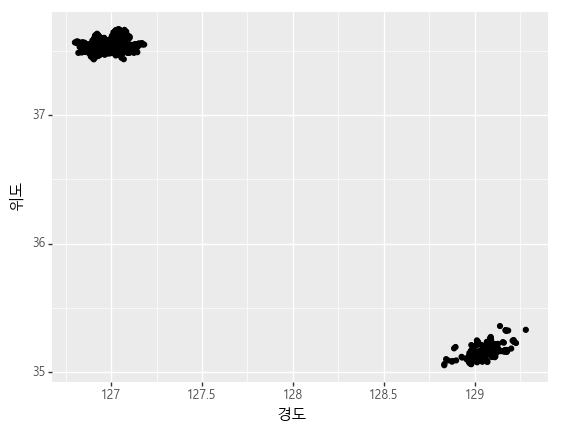

<ggplot: (156914583181)>

In [21]:
(ggplot(shop_2018[:1000])
 + aes(x='경도',y='위도')
 + geom_point()
 + theme(text=element_text(family=font_name)))

In [22]:
df_seoul = shop_2018.loc[shop_2018['시도명'].str.contains('서울')].copy()
df_seoul.shape

(346131, 39)

In [23]:
df_seoul.isnull().sum()

상가업소번호            0
상호명               0
지점명          295868
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      20018
표준산업분류명       20018
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         67123
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        304059
건물관리번호            0
건물명          180914
도로명주소             0
구우편번호             0
신우편번호             2
동정보          320099
층정보          103184
호정보          297845
경도                0
위도                0
dtype: int64

In [24]:
df_seoul['상권업종소분류명'].value_counts()

한식/백반/한정식      23863
커피전문점/카페/다방    16127
여성미용실          16020
부동산중개          12537
일반의류            9722
편의점             8406
종합소매            7555
호프/맥주           7366
라면김밥분식          6522
학원-입시           6350
비만/피부관리         5495
세탁소/빨래방         5397
화장품판매점          5006
후라이드/양념치킨       4393
수퍼마켓            4366
어린이집            4325
갈비/삼겹살          4253
학원(종합)          4075
노래방             3803
정통양식/경양식        3552
제과점             3482
인쇄종합            3474
자동차정비/카센타       3295
핸드폰소매           3090
약국              3024
학원-외국어/어학       2952
중국음식/중국집        2712
발/네일케어          2686
피아노/바이올린/기타     2569
국수/만두/칼국수       2533
               ...  
호신용품판매             1
종교서적판매             1
수입담배판매             1
학원-지점토             1
실외야구연습장            1
토종닭전문              1
회갑연서비스             1
낚시터                1
주말농장               1
불교서적판매             1
제기용품판매             1
공연티켓예매             1
음악감상               1
학원-세탁기술            1
학원-스튜디어스           1
영사기판매              1
학원-TV기술      

In [25]:
df_seoul.describe(include=np.object)

,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,...,법정동명,대지구분명,지번주소,도로명,건물관리번호,건물명,도로명주소,동정보,층정보,호정보
count,346131,50263,346131,346131,346131,346131,346131,346131,326113,326113,...,346131,346131,346131,346131,346131,165217,346131,26032,242947,48286
unique,239722,19715,9,9,94,94,693,693,210,210,...,465,2,125357,11895,125940,25625,125141,927,122,2539
top,점프셈교실,본점,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,...,신림동,대지,서울특별시 종로구 종로6가 262-1,서울특별시 서초구 신반포로,1111016400102700003012054,동대문종합시장,서울특별시 종로구 종로 266,1,1,1
freq,1709,304,113212,113212,36377,36377,23863,23863,44724,44724,...,6930,345771,975,3246,1007,1010,994,4540,163773,5708


In [28]:
df_seoul.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [33]:

df_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346131 entries, 0 to 500526
Data columns (total 39 columns):
상가업소번호       346131 non-null int64
상호명          346131 non-null object
지점명          50263 non-null object
상권업종대분류코드    346131 non-null object
상권업종대분류명     346131 non-null object
상권업종중분류코드    346131 non-null object
상권업종중분류명     346131 non-null object
상권업종소분류코드    346131 non-null object
상권업종소분류명     346131 non-null object
표준산업분류코드     326113 non-null object
표준산업분류명      326113 non-null object
시도코드         346131 non-null int64
시도명          346131 non-null object
시군구코드        346131 non-null int64
시군구명         346131 non-null object
행정동코드        346131 non-null int64
행정동명         346131 non-null object
법정동코드        346131 non-null int64
법정동명         346131 non-null object
지번코드         346131 non-null int64
대지구분코드       346131 non-null int64
대지구분명        346131 non-null object
지번본번지        346131 non-null int64
지번부번지        279008 non-null float64
지번주소         346131 non-null obje

In [34]:
df_seoul[['경도','위도']].describe(include=np.number)

,경도,위도
count,346131.000000,346131.000000
mean,126.994665,37.545310
std,0.081640,0.049124
min,126.768169,37.434081
25%,126.924830,37.504903
50%,127.008049,37.542095
75%,127.055645,37.573373
max,127.182588,37.692398


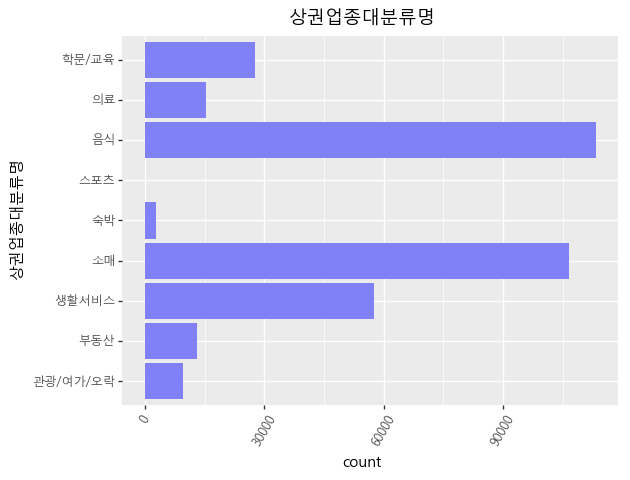

<ggplot: (156943809877)>

In [37]:
(ggplot(df_seoul)
 + aes('상권업종대분류명')
 + geom_bar(fill='#8181F7')
 + ggtitle('상권업종대분류명')
 + coord_flip()
 + theme(text=element_text(family=font_name), axis_text_x = element_text(rotation=60)))

In [40]:
df_food = df_seoul.loc[df_seoul['상권업종대분류명'].str.contains('음식')]
df_food.shape

(113212, 39)

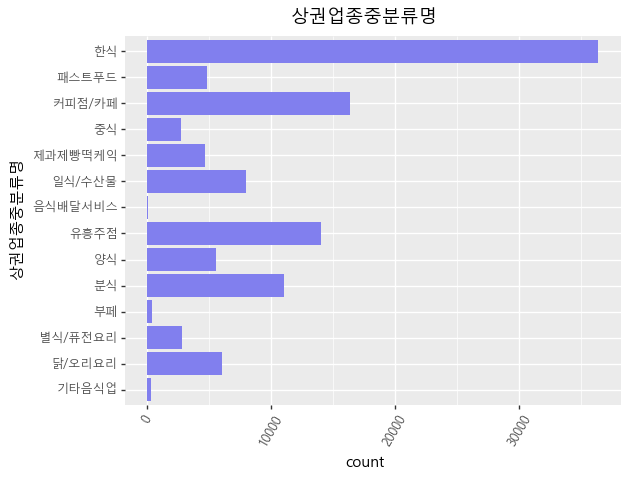

<ggplot: (156943801692)>

In [41]:
(ggplot(df_food)
 + aes('상권업종중분류명')
 + geom_bar(fill='#817FEE')
 + ggtitle('상권업종중분류명')
 + coord_flip()
 + theme(text=element_text(family=font_name),
        axis_text_x=element_text(rotation=60))
)

In [42]:
df_fast_food = df_seoul.loc[df_seoul['상권업종중분류명'] =='패스트푸드']
df_fast_food.shape

(4824, 39)

In [44]:
df_food.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [45]:
df_fast_food['상호명'].unique()

array(['피자마루', '롯데리아', '메가박스상봉', ..., '훌랄라참숯바베큐', '리코푸드코리아', '한스'],
      dtype=object)

## 베스킨라빈스와 던킨도너츠 입지분석

In [46]:
df_31 = df_seoul[df_seoul['상호명'].str.contains('배스킨|던킨')].copy()
df_31.shape

(446, 39)

In [48]:
df_31 = df_31[['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', 
               '지번주소', '도로명주소',  '위도', '경도', '시군구명', '행정동명']].copy()
df_31.shape

(446, 10)

In [49]:
df_31.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,지번주소,도로명주소,위도,경도,시군구명,행정동명
77,배스킨라빈스,관악구청점,음식,패스트푸드,서울특별시 관악구 봉천동 863-13,서울특별시 관악구 관악로 161,37.479599,126.952166,관악구,청룡동
1545,던킨도너츠테크노마트점,테크노마트점,음식,패스트푸드,서울특별시 광진구 구의동 546-4,서울특별시 광진구 광나루로56길 85,37.535713,127.095681,광진구,구의3동
1881,던킨도너츠창동하나로,NaN,음식,패스트푸드,서울특별시 도봉구 창동 1-10,서울특별시 도봉구 마들로11길 20,37.655101,127.050818,도봉구,창4동
1910,던킨도너츠용산민자역사2호,NaN,음식,패스트푸드,서울특별시 용산구 한강로3가 40-999,서울특별시 용산구 한강대로21나길 7,37.527903,126.963223,용산구,한강로동
2412,던킨도너츠,잠실본동점,음식,패스트푸드,서울특별시 송파구 잠실동 242-9,서울특별시 송파구 석촌호수로 118,37.507431,127.090005,송파구,잠실본동


In [50]:
df_31['상호명'].value_counts()

배스킨라빈스31               108
던킨도너츠                   86
배스킨라빈스                  46
던킨도넛                     4
배스킨라빈스31서울대점             1
배스킨라빈스청량리역사점             1
배스킨라빈스31방학역점             1
던킨&아트샵                   1
던킨도너츠홍제역점                1
배스킨라빈스31위례중앙점            1
던킨도너츠교대점                 1
던킨도너츠수서역점                1
배스킨라빈스31둔촌역점             1
배스킨라빈스31CAFE31광화문점       1
국제흥업개발던킨도너츠용산센트럴점        1
배스킨라빈스31안국역점             1
배스킨라빈스31대치2호점            1
배스킨라빈스31구로구청점            1
배스킨라빈스31북가좌점             1
배스킨라빈스31월곡홈플러스점          1
배스킨라빈스31둔촌푸르지오점          1
던킨도너츠시청역                 1
배스킨라빈스용산후암               1
배스킨라빈스31전농동아점            1
배스킨라빈스위례아이파크점            1
던킨도너츠합정역사점               1
배스킨라빈스서울역2호              1
용산역이마트배스킨라빈스             1
배스킨라빈스31잠실월드점            1
배스킨라빈스31굽은다리역점           1
                      ... 
배스킨라빈스31개봉중앙점            1
비알코리아던킨도너츠서여             1
던킨도너츠용산민자역사2호            1
던킨도너츠공릉역점                1
코레일유통던킨도너츠점              1
던킨도너츠신림양지병원점             1
배

In [51]:
df_31['브랜드명'] =''

In [52]:
df_31[['상호명', '브랜드명']].head()

,상호명,브랜드명
77,배스킨라빈스,
1545,던킨도너츠테크노마트점,
1881,던킨도너츠창동하나로,
1910,던킨도너츠용산민자역사2호,
2412,던킨도너츠,


In [53]:
df_31.loc[df_31['상호명'].str.contains('배스킨'), '브랜드명'] = '배스킨라빈스'
df_31.loc[df_31['상호명'].str.contains('던킨'),'브랜드명'] = '던킨도너츠'

In [55]:
df_31[['상호명','브랜드명']].head()

,상호명,브랜드명
77,배스킨라빈스,배스킨라빈스
1545,던킨도너츠테크노마트점,던킨도너츠
1881,던킨도너츠창동하나로,던킨도너츠
1910,던킨도너츠용산민자역사2호,던킨도너츠
2412,던킨도너츠,던킨도너츠


In [58]:
df_31_group_count = df_31['브랜드명'].value_counts()
df_31_group_count

배스킨라빈스    298
던킨도너츠     148
Name: 브랜드명, dtype: int64

In [61]:
df_31_ratio = df_31_group_count[0]/df_31_group_count[1]
print('제공된 데이터로 봤을 때 서울에 배스킨 매장이 던킨보다 {0:.2f} 배 정도 더 많다'. format(df_31_ratio))

제공된 데이터로 봤을 때 서울에 배스킨 매장이 던킨보다 2.01 배 정도 더 많다


In [62]:
df_31.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 77 to 500522
Data columns (total 11 columns):
상호명         446 non-null object
지점명         376 non-null object
상권업종대분류명    446 non-null object
상권업종중분류명    446 non-null object
지번주소        446 non-null object
도로명주소       446 non-null object
위도          446 non-null float64
경도          446 non-null float64
시군구명        446 non-null object
행정동명        446 non-null object
브랜드명        446 non-null object
dtypes: float64(2), object(9)
memory usage: 41.8+ KB
